In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

DATA_PATH = Path(r"C:\Users\gluzk\Desktop\parsed_data")
NO_CHEATER_PATH = Path.joinpath(DATA_PATH, 'no_cheater_present')
CHEATER_PATH = Path.joinpath(DATA_PATH, 'with_cheater_present')

EVENT_FILE_TYPE = ".json"
TICK_FILE_TYPE = ".parquet"

print(f"Cheater path     : {CHEATER_PATH}")
print(f"No cheaters path : {NO_CHEATER_PATH}")

Cheater path     : C:\Users\gluzk\Desktop\parsed_data\with_cheater_present
No cheaters path : C:\Users\gluzk\Desktop\parsed_data\no_cheater_present


In [2]:
# Loading json event data a list of tuples (str, pd.Dataframe)
def json_2_eventlist(filepath:str) -> list[tuple[str, pd.DataFrame]]:   
    with open(filepath, "r") as f:
        json_data = json.load(f)

    data = []       

    for key, value in json_data.items():
        if isinstance(value, list):
            df = pd.DataFrame(value)
            data.append((key, df))

    return data


In [40]:
total_cdata = 0
cheater_cdata = 0

for events_file in CHEATER_PATH.glob("*" + EVENT_FILE_TYPE):
    events = json_2_eventlist(events_file)
    round_ended_idx = -1
    for idx, i in enumerate(events):
        if i[0] == 'round_officially_ended':
            round_ended_idx = idx
            break
    if round_ended_idx == -1:
        raise Exception('round end idx not found')
    last_rounds = events[round_ended_idx][1]
    last_round_end_tick = np.array(last_rounds)[-1][0]
    total_cdata += last_round_end_tick
    
seconds_to_hours = 64 * 3600
print(f"Total number of ticks within cheater dataset: {total_cdata}")
print(f"Total number gameplay hours within cheater dataset: {round(total_cdata / seconds_to_hours, 1)}")

Total number of ticks within cheater dataset: 21503010
Total number gameplay hours within cheater dataset: 93.3


In [41]:
total_ncdata = 0

for events_file in NO_CHEATER_PATH.glob("*" + EVENT_FILE_TYPE):
    events = json_2_eventlist(str(events_file).replace('.parquet', '.json'))
    round_ended_idx = -1
    for idx, i in enumerate(events):
        if i[0] == 'round_officially_ended':
            round_ended_idx = idx
            break
    if round_ended_idx == -1:
        continue
    last_rounds = events[round_ended_idx][1]
    last_round_end_tick = np.array(last_rounds)[-1][0]
    total_ncdata += last_round_end_tick

print(f"Total number of ticks within not cheater dataset: {total_ncdata}")
print(f"Total number of gameplay hours within not cheater dataset: {round(total_ncdata / seconds_to_hours, 1)}")

Total number of ticks within not cheater dataset: 47778477
Total number of gameplay hours within not cheater dataset: 207.4


In [50]:
for pq_file in CHEATER_PATH.glob("*" + TICK_FILE_TYPE):
    ticks = pd.read_parquet(pq_file)
    # print(ticks.columns)
    for i in ticks.columns:
        print(r"        \item \texttt{" + i.replace("_", "\_") + "}")
    break

        \item \texttt{inventory}
        \item \texttt{usercmd\_input\_history}
        \item \texttt{inventory\_as\_ids}
        \item \texttt{approximate\_spotted\_by}
        \item \texttt{aim\_punch\_angle\_vel}
        \item \texttt{aim\_punch\_angle}
        \item \texttt{active\_weapon\_ammo}
        \item \texttt{item\_def\_idx}
        \item \texttt{weapon\_quality}
        \item \texttt{entity\_lvl}
        \item \texttt{item\_id\_high}
        \item \texttt{item\_id\_low}
        \item \texttt{inventory\_position}
        \item \texttt{is\_initialized}
        \item \texttt{econ\_item\_attribute\_def\_idx}
        \item \texttt{initial\_value}
        \item \texttt{refundable\_currency}
        \item \texttt{set\_bonus}
        \item \texttt{fire\_seq\_start\_time}
        \item \texttt{fire\_seq\_start\_time\_change}
        \item \texttt{m\_iState}
        \item \texttt{weapon\_mode}
        \item \texttt{accuracy\_penalty}
        \item \texttt{i\_recoil\_idx}
        \it

In [66]:
all_events = set()
for ev_file in CHEATER_PATH.glob("*" + EVENT_FILE_TYPE):
    ev = json_2_eventlist(ev_file)
    for i in ev:
        all_events.add(i[0])

for i in all_events:
    print(r"        \item \texttt{" + i.replace("_","\_") + "}")



        \item \texttt{round\_prestart}
        \item \texttt{begin\_new\_match}
        \item \texttt{decoy\_started}
        \item \texttt{player\_team}
        \item \texttt{cheaters}
        \item \texttt{item\_pickup}
        \item \texttt{cs\_round\_start\_beep}
        \item \texttt{decoy\_detonate}
        \item \texttt{bullet\_damage}
        \item \texttt{item\_equip}
        \item \texttt{round\_announce\_final}
        \item \texttt{other\_death}
        \item \texttt{cs\_win\_panel\_match}
        \item \texttt{bomb\_begindefuse}
        \item \texttt{smokegrenade\_detonate}
        \item \texttt{rank\_update}
        \item \texttt{round\_poststart}
        \item \texttt{round\_announce\_match\_start}
        \item \texttt{round\_announce\_last\_round\_half}
        \item \texttt{round\_officially\_ended}
        \item \texttt{player\_spawn}
        \item \texttt{inferno\_expire}
        \item \texttt{flashbang\_detonate}
        \item \texttt{weapon\_fire\_on\_empty}
     

In [98]:
def plot_map_distribution(map_list, title="Map Distribution", figsize=(10, 6)):
    map_counts = Counter(map_list)
    maps = list(map_counts.keys())
    counts = list(map_counts.values())
    
    sorted_items = sorted(zip(maps, counts), key=lambda x: x[1], reverse=True)
    sorted_maps, sorted_counts = zip(*sorted_items)

    plt.figure(figsize=figsize)
    bars = plt.bar(sorted_maps, sorted_counts, color='skyblue', edgecolor='black')
    plt.title(title, fontsize=18)
    plt.xlabel("Map", fontsize=15)
    plt.ylabel("Number of Matches", fontsize=15)
    plt.xticks(rotation=45, ha='right', fontsize=13)
    plt.yticks(fontsize=13)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 1, str(height),
                 ha='center', va='bottom', fontsize=15)

    plt.tight_layout()
    plt.show()

In [90]:
all_maps = []

for ev_file in NO_CHEATER_PATH.glob("*" + EVENT_FILE_TYPE):
    ev = json_2_eventlist(ev_file)
    csstats_idx = -1
    for idx, val in enumerate(ev):
        if val[0] == "CSstats_info":
            csstats_idx = idx
            break
    if csstats_idx == -1:
        raise Exception("not found")
    # all_maps.append(ev[csstats_idx][1])
    map = ev[csstats_idx][1]["map"].to_string()
    all_maps.append(map.replace("0    ",""))


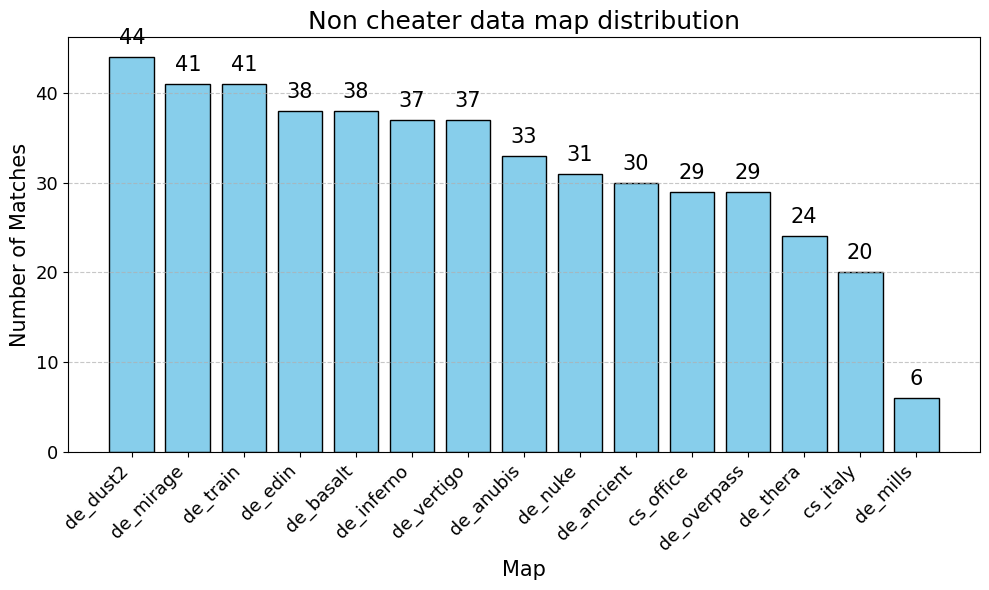

In [99]:
plot_map_distribution(all_maps, title="Non cheater data map distribution")

In [94]:
all_maps_cheater = []

for ev_file in CHEATER_PATH.glob("*" + EVENT_FILE_TYPE):
    ev = json_2_eventlist(ev_file)
    csstats_idx = -1
    for idx, val in enumerate(ev):
        if val[0] == "CSstats_info":
            csstats_idx = idx
            break
    if csstats_idx == -1:
        raise Exception("not found")
    # all_maps.append(ev[csstats_idx][1])
    map = ev[csstats_idx][1]["map"].to_string()
    all_maps_cheater.append(map.replace("0    ",""))


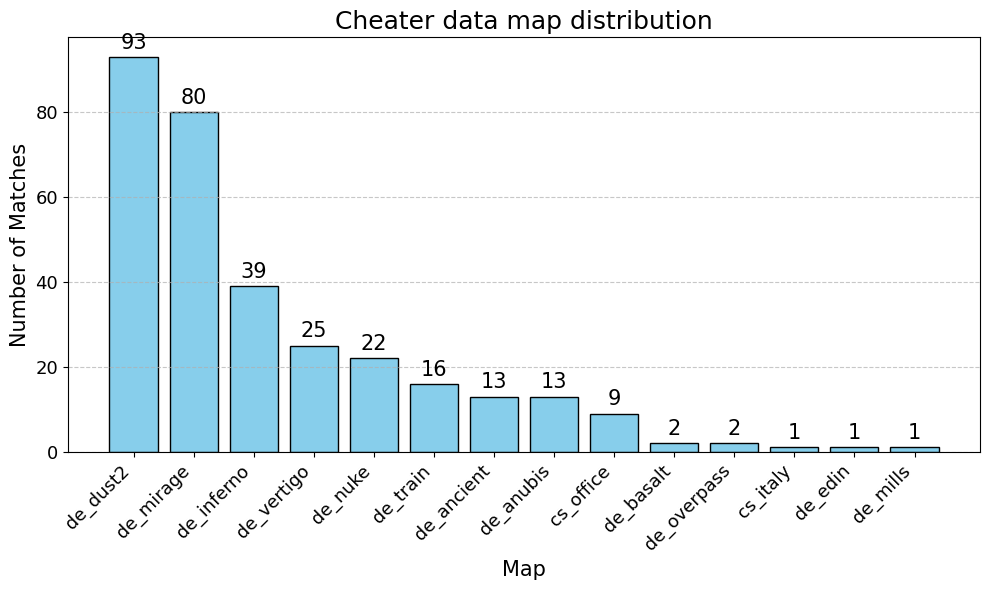

In [100]:
plot_map_distribution(all_maps_cheater, title="Cheater data map distribution")